# Lecture 3 Worksheet

## Recap

In the third lecture, we:
    
- VERY Briefly discussed the principles of effective dashboards
- Added callbacks to our class apps in Dash
- Deployed our apps on Heroku
- After class, I will commit my class app [here](https://github.com/firasm/dash_demo/tree/master/python/Class%20App)
    - For today's class, duplicate app3.py and call it app4.py
    - Feel free to use your own or [this version](https://github.com/firasm/dash_demo/blob/master/python/Class%20App/app3.py)

**app3.py:**

https://github.com/firasm/dash_demo/blob/master/python/Class%20App/app3.py

## Today's Agenda

- Part 1: Principles of Effective Dashboard Design (40 mins)
- Part 2: Introduction to dash-bootstrap-components (10 mins)
- Part 3: Adding dbc to our app (20 mins)

In [1]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import dash_bootstrap_components as dbc

import altair as alt
import vega_datasets

## Part 1: Principles of Effective Dashboard Design (40 mins)

No worksheet content for this part. I have added links to the dashboards we are going to see for your convenience.

We will be going through [this blog post](http://attackwithnumbers.com/the-laws-of-shitty-dashboard) today on how not to make a dashboard.

1. The first demo is the [stripe dashboard app](https://stripe.com/docs/dashboard).

1. The next one is about [prison sentences](https://fivethirtyeight.com/features/prison-reform-risk-assessment/#who-should-get-parole) from fivethirtyeight.com

1. The next one is a sample [index fund report](https://dash-gallery.plotly.host/dash-financial-report/full-view) from the Dash app gallery

1. The next one is the [delegate calculator](https://www.nytimes.com/interactive/2016/02/27/upshot/republican-delegate-calculator-how-trump-can-win.html) from the NYT.

1. The last one is about [election results](https://www.nytimes.com/interactive/2016/05/22/world/europe/europe-right-wing-austria-hungary.html) in 20 European countries.



## Part 2: Introduction to Dash Bootstrap Components

Docs for this package are [here](https://dash-bootstrap-components.opensource.faculty.ai/l/components/layout).

## Part 3: Adding Dash bootstrap components to our app

In particular, we will first update our basic `make_plot()` function to create a linked plot:

### Step 1: Update our `make_plot` function

In [9]:
## Replace your make_plot function with this altair linked plot

def make_plot(xval = 'Displacement',
              yval = 'Horsepower'):
    # Don't forget to include imports

    def mds_special():
        font = "Arial"
        axisColor = "#000000"
        gridColor = "#DEDDDD"
        return {
            "config": {
                "title": {
                    "fontSize": 24,
                    "font": font,
                    "anchor": "start", # equivalent of left-aligned.
                    "fontColor": "#000000"
                },
                'view': {
                    "height": 300, 
                    "width": 400
                },
                "axisX": {
                    "domain": True,
                    #"domainColor": axisColor,
                    "gridColor": gridColor,
                    "domainWidth": 1,
                    "grid": False,
                    "labelFont": font,
                    "labelFontSize": 12,
                    "labelAngle": 0, 
                    "tickColor": axisColor,
                    "tickSize": 5, # default, including it just to show you can change it
                    "titleFont": font,
                    "titleFontSize": 16,
                    "titlePadding": 10, # guessing, not specified in styleguide
                    "title": "X Axis Title (units)", 
                },
                "axisY": {
                    "domain": False,
                    "grid": True,
                    "gridColor": gridColor,
                    "gridWidth": 1,
                    "labelFont": font,
                    "labelFontSize": 14,
                    "labelAngle": 0, 
                    #"ticks": False, # even if you don't have a "domain" you need to turn these off.
                    "titleFont": font,
                    "titleFontSize": 16,
                    "titlePadding": 10, # guessing, not specified in styleguide
                    "title": "Y Axis Title (units)", 
                    # titles are by default vertical left of axis so we need to hack this 
                    #"titleAngle": 0, # horizontal
                    #"titleY": -10, # move it up
                    #"titleX": 18, # move it to the right so it aligns with the labels 
                },
            }
                }

    # register the custom theme under a chosen name
    alt.themes.register('mds_special', mds_special)

    # enable the newly registered theme
    alt.themes.enable('mds_special')
    #alt.themes.enable('none') # to return to default

    typeDict = {'Displacement':['quantitative','Displacement (mm)'],
                'Cylinders':['ordinal', 'Cylinders (#)'],
                'Miles_per_Gallon':['quantitative', 'Fuel Efficiency (mpg)'],
                'Horsepower':['quantitative', 'Horsepower (hp)']
                }

    # Create a plot from the cars dataset

    brush = alt.selection(type='interval')

    chart = alt.Chart(vega_datasets.data.cars.url).mark_point(size=90).encode(
                alt.X(xval,type=typeDict[xval][0], title=typeDict[xval][1]),
                alt.Y(yval,type=typeDict[yval][0], title=typeDict[yval][1]),
                color=alt.condition(brush, 'Origin:N', alt.value('lightgray')),
                tooltip = [{"type":typeDict[xval][0], "field":xval},
                           # {"type":typeDict[yval][0], "field":yval}
                           ] 
            ).properties(title='{0} vs. {1}'.format(xval,yval),
                        width=500, height=350).add_selection(brush)

    bars = alt.Chart(vega_datasets.data.cars.url).mark_bar().encode(
                     y='Origin:N',
                     color='Origin:N',
                     x='count(Origin):Q'
    ).transform_filter(brush)

    return (chart & bars)

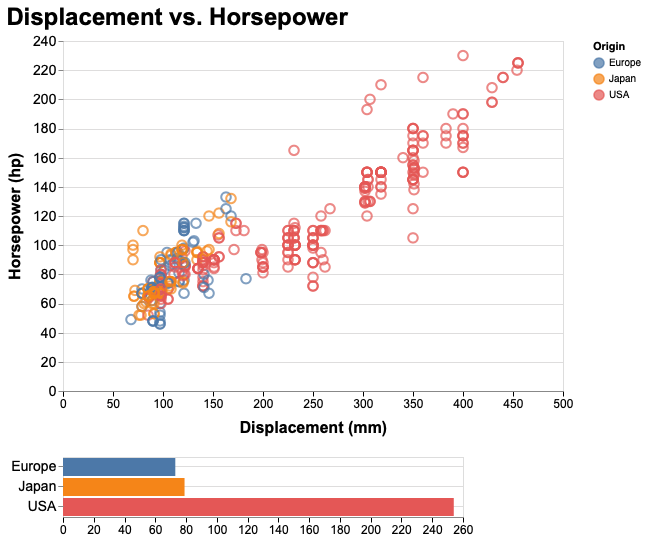

In [10]:
# Check to see if this works

make_plot()

### Step 2: Use the dash bootstrap components to create our layout

We will create three "lists": (jumbotron, content, footer).

Each has dbc components that we are passing to an html.Div. 

Let's create them one-by-one first. These should appear BEFORE `app.layout` and AFTER your plot functions

`jumbotron`:

This creates a nice header for us with an image, a description of the app, and a title.

In [21]:
jumbotron = dbc.Jumbotron(
    [
        dbc.Container(
            [
                html.Img(src='https://upload.wikimedia.org/wikipedia/commons/thumb/b/b7/Unico_Anello.png/1920px-Unico_Anello.png', 
                      width='100px'),
                html.H1("Cars! Cars! Explore Cars!", className="display-3"),
                html.P(
                    "Add a description of the dashboard",
                    className="lead",
                ),
            ],
            fluid=True,
        )
    ],
    fluid=True,
)

`content`:

In [22]:
content = dbc.Container([
    dbc.Row(
                [dbc.Col(
                    html.Iframe(
                        sandbox='allow-scripts',
                        id='plot',
                        height='560',
                        width='700',
                        style={'border-width': '0'},
                        ################ The magic happens here
                        srcDoc=make_plot().to_html()
                        ################ The magic happens here
                        ),width='6'),
                    dbc.Col(
                        dcc.Dropdown(
                            id='dd-chart-x',
                            options=[
                                {'label': 'Fuel Efficiency', 'value': 'Miles_per_Gallon'},
                                {'label': 'Cylinders', 'value': 'Cylinders'},
                                {'label': 'Displacement', 'value': 'Displacement'},
                                {'label': 'Horsepower', 'value': 'Horsepower'}
                            ],
                            value='Horsepower',
                            # style=dict(width='45%',
                            #         verticalAlign="middle")
                            ), width=2
                            ),
                    dbc.Col(        
                        dcc.Dropdown(
                        id='dd-chart-y',
                        options=[
                            {'label': 'Fuel Efficiency', 'value': 'Miles_per_Gallon'},
                            {'label': 'Cylinders', 'value': 'Cylinders'},
                            {'label': 'Displacement', 'value': 'Displacement'},
                            {'label': 'Horsepower', 'value': 'Horsepower'}
                        ],
                        value='Displacement'
                        ), width=2
                    )
                ]
            )
    ]
)

`footer`

This adds a bit of text at the bottom

In [23]:
footer = dbc.Container([
            dbc.Row(
                dbc.Col(
                    html.P('This Dash app was made collaboratively by the DSCI 532 class in 2019/20!')
                )
            )
         ]
)

Now we need to add these three lists to a Div and then make our `app.layout`

```app.layout = html.Div([jumbotron,
                       content,
                       footer])```